# Resistencia de cultivos de bacterias:



Primero vamos a generar un clasificador bayesiano ingenuo considerando una distribución del tipo normal ya que por la naturaleza de los datos consideramos que esta distribución es la que se mejor se adapta por otra vamos a considerar todo el conjunto de datos.

In [27]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from pandas.tools.plotting import scatter_matrix


#Carga de los datos:
data_set = pd.read_csv("bacterias.csv",sep=',',header=None,)

X=data_set[[0,1]].as_matrix()
Y=data_set[[2]].values

#Clasificador Bayesiano Ingenuo con distribución Gaussiana utilizando todos los datos.
clf = GaussianNB()
clf.fit(X, Y)
predicciones = clf.predict(X)

predicciones = predicciones.astype(int)

aciertos=0.0
total_datos= float(data_set.shape[0])
print total_datos
for ind in range(len(predicciones)):
    if predicciones[ind]==int(Y[ind][0]):
        aciertos+=1

#El porcentaje de aciertos es el siguiente:
print "El porcentaje de aciertos es el siguiente:"
print str((aciertos/total_datos)*100)+"%"



400.0
El porcentaje de aciertos es el siguiente:
54.75%


Por lo que podemos observar el rendimiento de nuestro clasificador es muy bajo usando todo el conjunto 
de datos. Lo que vamos hacer a continuación es volver a generar un clasificador con las mismas caracteristacas
cona la diferencia de que utilizaremos un 80% de los datos para entrenar y un 20% para probar nuestro 
clasificador. Esperando que teniendo menos datos al menos no mejore el rendimiento del clasificador anterior.

In [28]:
# Separar el conjunto de datos para training y para test.
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_set, test_size = 0.2)

X=train[[0,1]].as_matrix()
Y=train[[2]].as_matrix()

to_predict = test[[0,1]].as_matrix()
to_predict_val = test[[2]].as_matrix()

clf = GaussianNB()
clf.fit(X, Y)
predicciones = clf.predict(to_predict)
predicciones = predicciones.astype(int)

aciertos=0.0
total_datos= float(to_predict_val.shape[0]) 

for ind in range(len(predicciones)):
    if predicciones[ind]==int(to_predict_val[ind][0]):
        aciertos+=1

#El porcentaje de aciertos es el siguiente:
print "El porcentaje de aciertos es el siguiente:"
print str((aciertos/total_datos)*100)+"%"


El porcentaje de aciertos es el siguiente:
48.75%


De algunas ejecuciones de nuestro clasificador obtuvimos los siguientes porcentajes 52.5%, 58.75%, 45.0% donde se genera un poco de duda estos resultados que teniendo menos datos para entrenar el rendimiento en algunos casos mejore pero por otra parte también baja. Entonces podemos ver que el rendimiento es variable.  Para poder entender más lo que ocurre con nuestros datos vamos a hacer una visualización donde los puntos rojos son un tipo de bacteria y los azules otro. En base a la visualización de los datos podemos decir que es difícil poder separar un tipo de bacteria con respecto a otra es por ello que en un principio nuestro clasificador tenia un bajo rendimiento por esta situación y el caso cuando tomamos un 80% de manera aleatoria para entrenar mejoraba algunas veces debido a que podíamos escoger este subconjunto de puntos con una cantidad menor de traslapes pero como es aleatoria la muestra que se toma también se pueden generar muestras donde se siga manteniendo el traslape de los datos. Por otra parte genera una correlación entre las variables.

<IPython.core.display.Javascript object>


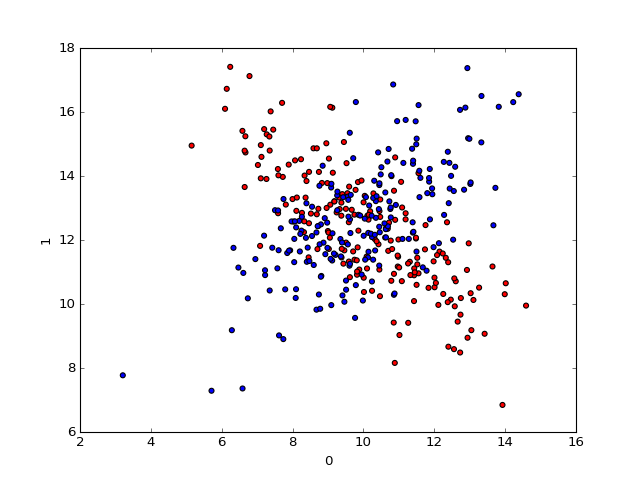

In [38]:
cmap = {0.0: 'red', 1.0: 'blue'}
data_set.plot(x=0, y=1, kind='scatter',
             c=[cmap.get(c, 'black') for c in data_set[2]])

# Usando otra distribución:
Ahora lo que vamos hacer es usar otro tipo de distribución y ver el rendimiento que genera. Tanto para todo 
el conjunto de datos como para una subconjunto. 

In [39]:
#Carga de los datos:
data_set = pd.read_csv("bacterias.csv",sep=',',header=None,)

X=data_set[[0,1]].as_matrix()
Y=data_set[[2]].values

#Clasificador Bayesiano Ingenuo con distribución Bernoulli utilizando todos los datos.
clf = BernoulliNB()
clf.fit(X, Y)
predicciones = clf.predict(X)

predicciones = predicciones.astype(int)

aciertos=0.0
total_datos= float(data_set.shape[0])
print total_datos
for ind in range(len(predicciones)):
    if predicciones[ind]==int(Y[ind][0]):
        aciertos+=1

#El porcentaje de aciertos es el siguiente:
print "El porcentaje de aciertos es el siguiente:"
print str((aciertos/total_datos)*100)+"%"

400.0
El porcentaje de aciertos es el siguiente:
50.0%


In [40]:
# Separar el conjunto de datos para training y para test.
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_set, test_size = 0.2)

X=train[[0,1]].as_matrix()
Y=train[[2]].as_matrix()

to_predict = test[[0,1]].as_matrix()
to_predict_val = test[[2]].as_matrix()

clf = BernoulliNB()
clf.fit(X, Y)
predicciones = clf.predict(to_predict)
predicciones = predicciones.astype(int)

aciertos=0.0
total_datos= float(to_predict_val.shape[0]) 

for ind in range(len(predicciones)):
    if predicciones[ind]==int(to_predict_val[ind][0]):
        aciertos+=1

#El porcentaje de aciertos es el siguiente:
print "El porcentaje de aciertos es el siguiente:"
print str((aciertos/total_datos)*100)+"%"

El porcentaje de aciertos es el siguiente:
48.75%


Como podemos notar el rendimiento de nuestro clasificador no mejora utilizando una distribución del tipo 
Bernoulli esto en gran mediad se debe a que al momento de aplica runa variable de este tipo lo que esta 
pasando es que estamos perdiendo información al momento de binarizar que es un proceso que se realiza para 
poder aplicar BernoulliNB. 

# Conclusiones:

Una desventaja que podemos observar al utilizar el clasificador bayesiano ingenuo es que asume la independencia entre las variables lo cual es una fuerte aseveración la cual no se cumple siempre. Es por ello que en nuestros clasificadores para este problema no tuvieron un buen rendimiento en general. Se tiene 
que tener cuidado a la hora de utilizar este tipo de clasificador.